In [9]:
# initialize the reward matrix
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)
num_states = 5
num_actions = 5 # producing highest quantity
action2bid = np.linspace(0,1,num_actions)
reward = np.zeros((num_actions, num_actions))
for i in range(reward.shape[0]):
    for j in range(reward.shape[1]):
      if i>j: 
        reward[i, j] += 1-action2bid[i]
      elif i==j:
        reward[i, j] += (1-action2bid[i])/2
      else:
        reward[i, j] += 0

In [10]:
import random
import numpy as np

# initialize parameters
gamma = 0.0
alpha = 0.1
initial_eps = 1.0
eps_decay = 0.99999
min_eps = 0.001
eps = initial_eps

# initialize the Q-table
Q_period1 = np.ones((num_actions))
Q_period2 = np.ones((num_actions))
agent1_period1_history = []
agent1_period2_history = []
agent1_total_reward = []

In [11]:
# initialize the state
num_episodes = 500000
for episode in range(num_episodes):

    # ------ Period 1 ------
    # take the action according to exploratory policy
    if np.random.uniform()>eps:
        action1 = np.argmax(Q_period1)
    else:
        action1 = np.random.choice(range(num_actions))

    # opponent's action
    action_opponent1 = 0
    
    # ------ Period 2 ------
    
    # take the action according to exploratory policy
    if np.random.uniform()>eps:
        action2 = np.argmax(Q_period2)
    else:
        action2 = np.random.choice(range(num_actions))
   
    # opponent's action
    action_opponent2 = min(action1, num_actions - 1)

    # collect rewards
    final_reward = reward[action2, action_opponent2]
    

     # ------ Update Step ------
   
    # update the Q-value for the selected action in the current state
    Q_period1[action1] =  (1-alpha)*Q_period1[action1] + alpha * (final_reward + gamma * np.max(Q_period1))
    Q_period2[action2] =  (1-alpha)*Q_period2[action2] + alpha * (final_reward + gamma * np.max(Q_period2))

    # update epsilon
    eps = max(min_eps, eps * eps_decay)

    # print results
    if episode%100000==0:
      print('\n',episode, eps)

    # store history
    agent1_period1_history.append(action1)
    agent1_period2_history.append(action2)
    agent1_total_reward.append(final_reward)


 0 0.99999

 100000 0.36787392299223054

 200000 0.13533257654345696

 300000 0.0497858236999252

 400000 0.018315089424785415


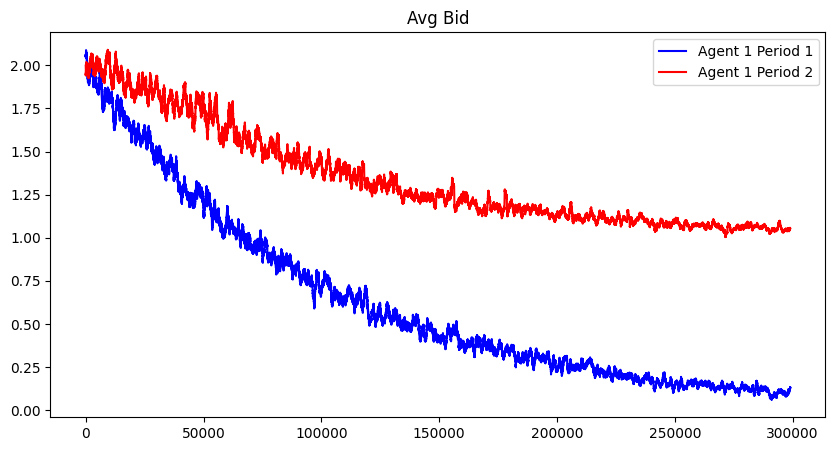

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams['font.size']=10
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
plt.plot(moving_average(np.array(agent1_period1_history),1000), label = 'Agent 1 Period 1',c='b')
plt.plot(moving_average(np.array(agent1_period2_history),1000), label = 'Agent 1 Period 2',c='r')
plt.title('Avg Bid') 
plt.legend()
plt.show()

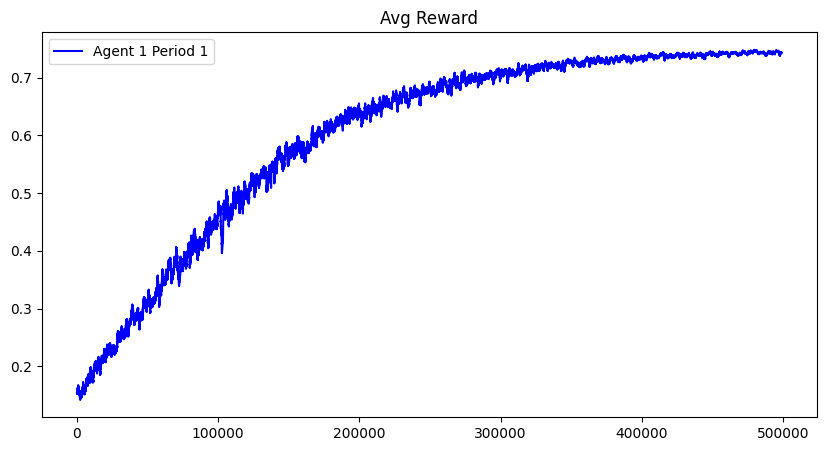

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams['font.size']=10
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
plt.plot(moving_average(np.array(agent1_total_reward),1000), label = 'Agent 1 Period 1', c = 'b')
plt.title('Avg Reward') 
plt.legend()
plt.show()